# Read_csv

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pylab as plt

In [2]:
df = pd.read_csv(r'C:\kaggle\sales_train.csv')

In [3]:
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [4]:
df.drop_duplicates(keep='first',inplace=True)

In [5]:
df.isna().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [6]:
def DateMonth(time):
    day,month,year = time.split('.')
    #If require complete datetime type columns, use the following comment
    #return datetime.datetime(int(year),int(month),int(day))
    return int(month)
df['month']=list(map(DateMonth,df['date']))

In [7]:
df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month
0,02.01.2013,0,59,22154,999.00,1.0,1
1,03.01.2013,0,25,2552,899.00,1.0,1
2,05.01.2013,0,25,2552,899.00,-1.0,1
3,06.01.2013,0,25,2554,1709.05,1.0,1
4,15.01.2013,0,25,2555,1099.00,1.0,1
...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0,10
2935845,09.10.2015,33,25,7460,299.00,1.0,10
2935846,14.10.2015,33,25,7459,349.00,1.0,10
2935847,22.10.2015,33,25,7440,299.00,1.0,10


In [8]:
df.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,month
count,2.935843e+06,2.935843e+06,2.935843e+06,2.935843e+06,2.935843e+06,2.935843e+06
mean,1.456991e+01,3.300171e+01,1.019723e+04,8.908535e+02,1.242641e+00,6.247719e+00
std,9.422992e+00,1.622698e+01,6.324293e+03,1.729801e+03,2.618837e+00,3.536219e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01,1.000000e+00
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00,3.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00,6.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00,9.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03,1.200000e+01


In [9]:
df.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'month'],
      dtype='object')

In [10]:
col = df.drop('date',axis=1).columns
col

Index(['date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day',
       'month'],
      dtype='object')

In [11]:
df = df[col].groupby(["item_id","shop_id","date_block_num"]).agg({'item_price':'mean','month':'mean','item_cnt_day':'sum'}).reset_index()
df.rename(columns = {"item_cnt_day":"item_cnt_month"},inplace=True)
df

,item_id,shop_id,date_block_num,item_price,month,item_cnt_month
0,0,54,20,58.0,9,1.0
1,1,55,15,4490.0,4,2.0
2,1,55,18,4490.0,7,1.0
3,1,55,19,4490.0,8,1.0
4,1,55,20,4490.0,9,1.0
...,...,...,...,...,...,...
1609119,22168,12,8,799.0,9,1.0
1609120,22168,16,1,799.0,2,1.0
1609121,22168,42,1,799.0,2,1.0
1609122,22168,43,2,798.5,3,1.0


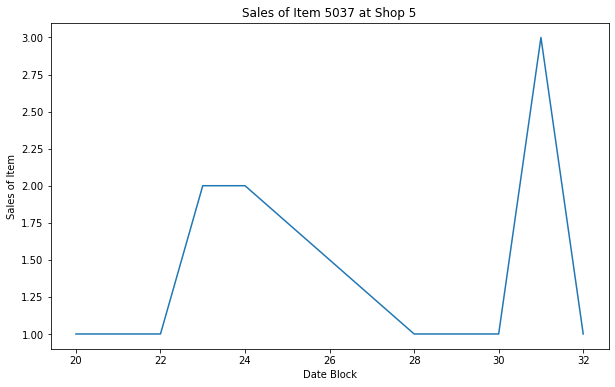

In [12]:
check = df.loc[(df['shop_id'] == 5) & (df['item_id'] == 5037)]
plt.figure(figsize=(10,6))
plt.title('Sales of Item 5037 at Shop 5')
plt.xlabel('Date Block')
plt.ylabel('Sales of Item')
plt.plot(check['date_block_num'],check['item_cnt_month'])

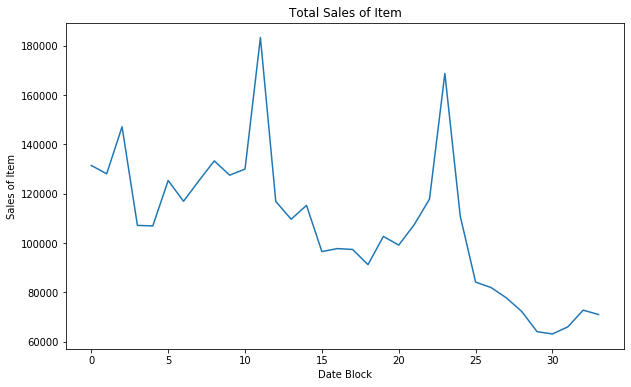

In [13]:
from matplotlib import pylab as plt
check = df[['date_block_num','item_cnt_month']].groupby(["date_block_num"]).sum().reset_index()
plt.figure(figsize=(10,6))
plt.title('Total Sales of Item')
plt.xlabel('Date Block')
plt.ylabel('Sales of Item')
plt.plot(check['date_block_num'],check['item_cnt_month'])

In [14]:
df['season']=None
df['season'].loc[(df['month']>=2) & (df['month']<=4)]=1
df['season'].loc[(df['month']>=5) & (df['month']<=7)]=2
df['season'].loc[(df['month']>=8) & (df['month']<=10)]=3
df['season'].loc[(df['month']==11) | (df['month']==12) | (df['month']==1)]=4

C:\Users\10039\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


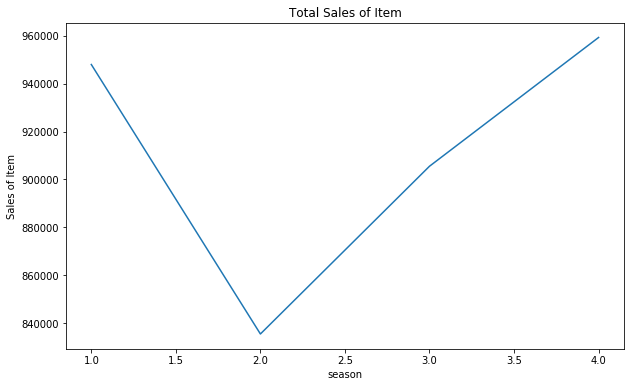

In [15]:
check = df[['season','item_cnt_month']].groupby(["season"]).sum().reset_index()
plt.figure(figsize=(10,6))
plt.title('Total Sales of Item')
plt.xlabel('season')
plt.ylabel('Sales of Item')
plt.plot(check['season'],check['item_cnt_month'])

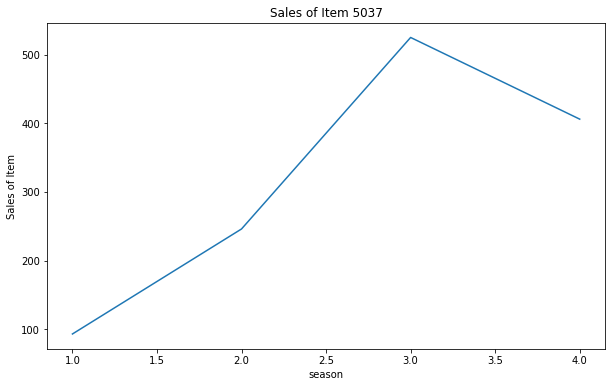

In [16]:
check = df.loc[df['item_id'] == 5037]
check = check[['season','item_cnt_month']].groupby(["season"]).sum().reset_index()
plt.figure(figsize=(10,6))
plt.title('Sales of Item 5037')
plt.xlabel('season')
plt.ylabel('Sales of Item')
plt.plot(check['season'],check['item_cnt_month'])

In [17]:
date_block_all = pd.DataFrame(range(0,34),columns = ['date_block_num'])
date_block_all

,date_block_num
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [18]:
pd.merge(df,date_block_all,on=['date_block_num'],how='right')

,item_id,shop_id,date_block_num,item_price,month,item_cnt_month,season
0,0,54,20,58.0,9,1.0,3
1,1,55,20,4490.0,9,1.0,3
2,4,54,20,58.0,9,1.0,3
3,8,54,20,58.0,9,1.0,3
4,13,54,20,58.0,9,1.0,3
...,...,...,...,...,...,...,...
1609119,22167,28,33,299.0,10,1.0,3
1609120,22167,37,33,299.0,10,1.0,3
1609121,22167,42,33,299.0,10,4.0,3
1609122,22167,47,33,299.0,10,1.0,3


In [19]:
for i in range(1,6):
    df['T'+str(i)] = df['item_cnt_month'].shift(i)
df.fillna(0,inplace=True)

In [20]:
df

,item_id,shop_id,date_block_num,item_price,month,item_cnt_month,season,T1,T2,T3,T4,T5
0,0,54,20,58.0,9,1.0,3,0.0,0.0,0.0,0.0,0.0
1,1,55,15,4490.0,4,2.0,1,1.0,0.0,0.0,0.0,0.0
2,1,55,18,4490.0,7,1.0,2,2.0,1.0,0.0,0.0,0.0
3,1,55,19,4490.0,8,1.0,3,1.0,2.0,1.0,0.0,0.0
4,1,55,20,4490.0,9,1.0,3,1.0,1.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1609119,22168,12,8,799.0,9,1.0,3,1.0,1.0,1.0,2.0,1.0
1609120,22168,16,1,799.0,2,1.0,1,1.0,1.0,1.0,1.0,2.0
1609121,22168,42,1,799.0,2,1.0,1,1.0,1.0,1.0,1.0,1.0
1609122,22168,43,2,798.5,3,1.0,1,1.0,1.0,1.0,1.0,1.0


In [21]:
item_category_id = pd.read_csv(r'C:\kaggle\items.csv')
item_category_id

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [22]:
item_category = pd.read_csv(r'C:\kaggle\item_categories.csv')
item_category

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


In [23]:
df_category = pd.merge(item_category_id,item_category,on=['item_category_id'])
df_category

,item_name,item_id,item_category_id,item_category_name
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD
1,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD
2,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD
3,***КОРОБКА (СТЕКЛО) D,4,40,Кино - DVD
4,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40,Кино - DVD
...,...,...,...,...
22165,Элемент питания GP 15AU (LR6) - Блистер 2 шт U...,22095,83,Элементы питания
22166,Элемент питания GP 24A (LR03) - Блистер 2 шт,22096,83,Элементы питания
22167,Элемент питания GP 24AU (LR03) - Блистер 2 шт ...,22097,83,Элементы питания
22168,Элемент питания КОСМОС LR03 2*BL,22098,83,Элементы питания


In [24]:
#df_category[df_category['item_category_id']==61]

In [25]:
df_category['item_category_id'].astype(np.int32)
df_category['new_item_category'] = 'other'
df_category['new_item_category'].loc[df_category['item_category_id'].between(1,8,inclusive=True)] = 'Digital Appliances'
df_category['new_item_category'].loc[df_category['item_category_id'].between(10,18,inclusive=True)] = 'Consoles'
df_category['new_item_category'].loc[df_category['item_category_id'].between(18,25,inclusive=True)] = 'Consoles Games'
df_category['new_item_category'].loc[df_category['item_category_id'].between(26,27,inclusive=True)] = 'Phone games'
df_category['new_item_category'].loc[df_category['item_category_id'].between(28,31,inclusive=True)] = 'CD games'
df_category['new_item_category'].loc[df_category['item_category_id'].between(32,36,inclusive=True)] = 'Card'
df_category['new_item_category'].loc[df_category['item_category_id'].between(37,42,inclusive=True)] = 'Movie'
df_category['new_item_category'].loc[df_category['item_category_id'].between(43,54,inclusive=True)] = 'Books'
df_category['new_item_category'].loc[df_category['item_category_id'].between(55,60,inclusive=True)] = 'Music'
df_category['new_item_category'].loc[df_category['item_category_id'].between(61,72,inclusive=True)] = 'Gifts'
df_category['new_item_category'].loc[df_category['item_category_id'].between(73,79,inclusive=True)] = 'Soft'

(array([8629., 4325., 1777., 2167., 1261., 3528.,   42.,  228.,   11.,
         202.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

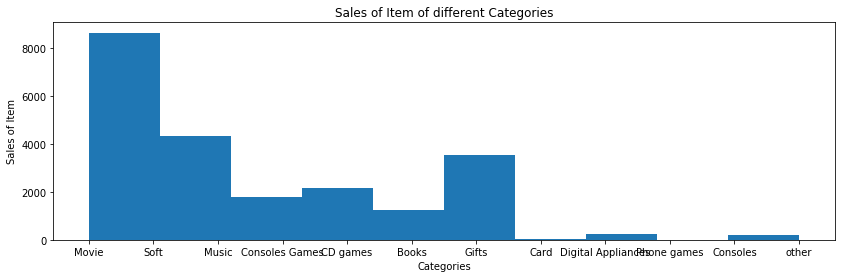

In [26]:
plt.figure(figsize=(14,4))
plt.title('Sales of Item of different Categories')
plt.xlabel('Categories')
plt.ylabel('Sales of Item')
plt.hist(df_category['new_item_category'])

In [27]:
df = pd.merge(df,df_category[['item_id','new_item_category']],on=['item_id'],how='left')

In [28]:
df = df[['shop_id','item_id', 'date_block_num','season','new_item_category','item_price',
       'T1', 'T2', 'T3', 'T4', 'T5', 'item_cnt_month']]
df

,shop_id,item_id,date_block_num,season,new_item_category,item_price,T1,T2,T3,T4,T5,item_cnt_month
0,54,0,20,3,Movie,58.0,0.0,0.0,0.0,0.0,0.0,1.0
1,55,1,15,1,Soft,4490.0,1.0,0.0,0.0,0.0,0.0,2.0
2,55,1,18,2,Soft,4490.0,2.0,1.0,0.0,0.0,0.0,1.0
3,55,1,19,3,Soft,4490.0,1.0,2.0,1.0,0.0,0.0,1.0
4,55,1,20,3,Soft,4490.0,1.0,1.0,2.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1609119,12,22168,8,3,Gifts,799.0,1.0,1.0,1.0,2.0,1.0,1.0
1609120,16,22168,1,1,Gifts,799.0,1.0,1.0,1.0,1.0,2.0,1.0
1609121,42,22168,1,1,Gifts,799.0,1.0,1.0,1.0,1.0,1.0,1.0
1609122,43,22168,2,1,Gifts,798.5,1.0,1.0,1.0,1.0,1.0,1.0


In [29]:
df_cate = pd.get_dummies(df['new_item_category'],drop_first=True)
df_season = pd.get_dummies(df['season'],drop_first=True,prefix='season')
df = pd.concat([df,df_cate,df_season],axis=1)
df.drop(['new_item_category','season'],axis=1,inplace=True)
df

,shop_id,item_id,date_block_num,item_price,T1,T2,T3,T4,T5,item_cnt_month,...,Digital Appliances,Gifts,Movie,Music,Phone games,Soft,other,season_2,season_3,season_4
0,54,0,20,58.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,1,0
1,55,1,15,4490.0,1.0,0.0,0.0,0.0,0.0,2.0,...,0,0,0,0,0,1,0,0,0,0
2,55,1,18,4490.0,2.0,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,1,0,1,0,0
3,55,1,19,4490.0,1.0,2.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,1,0,0,1,0
4,55,1,20,4490.0,1.0,1.0,2.0,1.0,0.0,1.0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609119,12,22168,8,799.0,1.0,1.0,1.0,2.0,1.0,1.0,...,0,1,0,0,0,0,0,0,1,0
1609120,16,22168,1,799.0,1.0,1.0,1.0,1.0,2.0,1.0,...,0,1,0,0,0,0,0,0,0,0
1609121,42,22168,1,799.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,0
1609122,43,22168,2,798.5,1.0,1.0,1.0,1.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,0


In [30]:
drop = df[(df['date_block_num']>=0) & (df['date_block_num']<=4)].index
df.drop(drop,axis=0,inplace=True)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col = [x for x in df.columns if x not in ['shop_id','item_id','item_cnt_month']]
df[col] = scaler.fit_transform(df[col])

In [32]:
df

,shop_id,item_id,date_block_num,item_price,T1,T2,T3,T4,T5,item_cnt_month,...,Digital Appliances,Gifts,Movie,Music,Phone games,Soft,other,season_2,season_3,season_4
0,54,0,0.303475,-0.471578,-0.254952,-0.260224,-0.263105,-0.263939,-0.262449,1.0,...,-0.158018,-0.393804,1.466056,-0.473894,-0.004857,-0.138140,-0.047232,-0.602407,1.553884,-0.570727
1,55,1,-0.310302,2.251737,-0.145780,-0.260224,-0.263105,-0.263939,-0.262449,2.0,...,-0.158018,-0.393804,-0.682102,-0.473894,-0.004857,7.239047,-0.047232,-0.602407,-0.643549,-0.570727
2,55,1,0.057964,2.251737,-0.036608,-0.150090,-0.263105,-0.263939,-0.262449,1.0,...,-0.158018,-0.393804,-0.682102,-0.473894,-0.004857,7.239047,-0.047232,1.660006,-0.643549,-0.570727
3,55,1,0.180720,2.251737,-0.145780,-0.039956,-0.153391,-0.263939,-0.262449,1.0,...,-0.158018,-0.393804,-0.682102,-0.473894,-0.004857,7.239047,-0.047232,-0.602407,1.553884,-0.570727
4,55,1,0.303475,2.251737,-0.145780,-0.150090,-0.043676,-0.154474,-0.262449,1.0,...,-0.158018,-0.393804,-0.682102,-0.473894,-0.004857,7.239047,-0.047232,-0.602407,1.553884,-0.570727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609114,59,22167,-1.046835,-0.323491,-0.145780,-0.150090,-0.153391,-0.154474,-0.153939,1.0,...,-0.158018,-0.393804,-0.682102,-0.473894,-0.004857,-0.138140,-0.047232,-0.602407,1.553884,-0.570727
1609115,59,22167,-0.801324,-0.323491,-0.145780,-0.150090,-0.153391,-0.154474,-0.153939,2.0,...,-0.158018,-0.393804,-0.682102,-0.473894,-0.004857,-0.138140,-0.047232,-0.602407,-0.643549,1.752150
1609116,59,22167,-0.064791,-0.323491,-0.036608,-0.150090,-0.153391,-0.154474,-0.153939,1.0,...,-0.158018,-0.393804,-0.682102,-0.473894,-0.004857,-0.138140,-0.047232,1.660006,-0.643549,-0.570727
1609119,12,22168,-1.169591,-0.016258,-0.145780,-0.150090,-0.153391,-0.045009,-0.153939,1.0,...,-0.158018,2.539337,-0.682102,-0.473894,-0.004857,-0.138140,-0.047232,-0.602407,1.553884,-0.570727


In [33]:
pd.DataFrame(np.corrcoef(df.T),columns=df.columns,index=df.columns)

,shop_id,item_id,date_block_num,item_price,T1,T2,T3,T4,T5,item_cnt_month,...,Digital Appliances,Gifts,Movie,Music,Phone games,Soft,other,season_2,season_3,season_4
shop_id,1.000000,0.026099,-0.009368,-0.028086,-0.000821,-0.000981,-0.001038,-0.001438,-0.001757,-0.000977,...,-0.012905,-0.000125,0.032331,0.008569,0.006436,0.005493,-0.001969,0.000716,-0.003868,0.002378
item_id,0.026099,1.000000,-0.007226,-0.116390,-0.008473,-0.009166,-0.010467,-0.011153,-0.011765,-0.008227,...,-0.092994,0.266322,0.435762,-0.092478,-0.004840,-0.135794,0.060417,0.002298,-0.004197,0.005014
date_block_num,-0.009368,-0.007226,1.000000,0.085950,0.002587,0.008237,0.011500,0.017236,0.021879,-0.003983,...,0.014526,0.086178,-0.076746,-0.027162,0.006167,-0.009566,0.013190,-0.068528,0.030127,-0.061418
item_price,-0.028086,-0.116390,0.085950,1.000000,0.026474,0.026098,0.024872,0.024443,0.023770,0.024298,...,0.114389,0.014096,-0.202381,-0.129164,-0.001579,0.087314,-0.016424,-0.027113,-0.000134,0.023782
T1,-0.000821,-0.008473,0.002587,0.026474,1.000000,0.646405,0.563372,0.536217,0.506308,0.644287,...,0.003864,0.028802,-0.042298,-0.048037,0.000660,0.009659,0.058971,-0.009228,-0.003953,0.013373
T2,-0.000981,-0.009166,0.008237,0.026098,0.646405,1.000000,0.637358,0.556364,0.530106,0.562636,...,0.005028,0.027546,-0.041842,-0.049276,0.000203,0.009615,0.054950,-0.006946,-0.007467,0.000073
T3,-0.001038,-0.010467,0.011500,0.024872,0.563372,0.637358,1.000000,0.639633,0.556042,0.534477,...,0.004689,0.026424,-0.042260,-0.050460,-0.000023,0.009533,0.055594,-0.002462,-0.006831,-0.005535
T4,-0.001438,-0.011153,0.017236,0.024443,0.536217,0.556364,0.639633,1.000000,0.641712,0.507421,...,0.004691,0.026565,-0.042843,-0.050896,-0.000150,0.009633,0.055684,0.000441,-0.003033,-0.007850
T5,-0.001757,-0.011765,0.021879,0.023770,0.506308,0.530106,0.556042,0.641712,1.000000,0.497009,...,0.004732,0.026311,-0.043345,-0.050788,-0.000272,0.009755,0.056083,0.004801,0.000659,-0.009391
item_cnt_month,-0.000977,-0.008227,-0.003983,0.024298,0.644287,0.562636,0.534477,0.507421,0.497009,1.000000,...,0.006728,0.029036,-0.041928,-0.046311,0.000847,0.009623,0.052662,-0.014278,0.003376,0.015863


In [34]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

In [38]:
xgb = XGBRegressor()
parameters = {
              'objective':['reg:linear'],
              'learning_rate': [0.3, 0.5, 0.7], 
              'max_depth': [7, 10, 15],
              'subsample': [0.7],
              'n_estimators': [500],
              'eval_metric':['rmse']}
xgb_grid = GridSearchCV(xgb,parameters,cv = 3,n_jobs = -1,verbose=True)

df_sample = df.sample(frac=0.1, replace=False, random_state=1)
X = df_sample.drop('item_cnt_month',axis=1)
Y = df_sample['item_cnt_month']
xgb_grid.fit(X,Y)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 21.9min finished


[19:10:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estima...
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=False, verbosity=None),
             iid='deprecated', n_jobs=-1,
             param_grid=

In [39]:
best_grid = xgb_grid.best_estimator_
best_grid

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='rmse',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints=None, learning_rate=0.3, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints=None, n_estimators=500, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method=None, validate_parameters=False, verbosity=None)

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)